In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("laptops.csv")
print(df.head(5))

   Unnamed: 0                                              title    price  \
0           0  DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...  ₹37,990   
1           1  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...  ₹35,490   
2           2  Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...  ₹33,999   
3           3  HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...  ₹45,490   
4           4  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...  ₹33,990   

         discount                                          Processor  \
0  ₹58,48935% off  Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...   
1  ₹47,20624% off                 Intel Core i3 Processor (11th Gen)   
2  ₹59,76043% off                 Intel Core i3 Processor (11th Gen)   
3  ₹56,26019% off                 Intel Core i3 Processor (12th Gen)   
4  ₹45,99026% off                 Intel Core i3 Processor (10th Gen)   

                                             RAM  \
0  RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD   


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   920 non-null    int64 
 1   title        920 non-null    object
 2   price        920 non-null    object
 3   discount     831 non-null    object
 4   Processor    920 non-null    object
 5   RAM          920 non-null    object
 6   OS           920 non-null    object
 7   SSD          920 non-null    object
 8   Display      920 non-null    object
 9   In_build_sw  357 non-null    object
 10  warranty     906 non-null    object
dtypes: int64(1), object(10)
memory usage: 79.2+ KB
None


In [7]:
print(df.shape)

(920, 11)


In [12]:
df.drop(columns=["Unnamed: 0"] , inplace=True)
print(df.columns)

Index(['title', 'price', 'discount', 'Processor', 'RAM', 'OS', 'SSD',
       'Display', 'In_build_sw', 'warranty'],
      dtype='object')


In [18]:
print(df["price"][:20])


0     ₹37,990
1     ₹35,490
2     ₹33,999
3     ₹45,490
4     ₹33,990
5     ₹67,990
6     ₹52,990
7     ₹47,990
8     ₹49,123
9     ₹57,499
10    ₹62,990
11    ₹29,990
12    ₹39,990
13    ₹27,799
14    ₹26,990
15    ₹35,990
16    ₹54,990
17    ₹20,990
18    ₹39,990
19    ₹23,990
Name: price, dtype: object


In [25]:
print(df["price"].dtype)

int64


In [ ]:
df["price_cleaned"] = df["price"].str.replace("₹","",regex=False).str.replace(",","",regex=True)
df["price_cleaned"] = pd.to_numeric(df["price_cleaned"], errors="coerce")

price_mean = df["price_cleaned"].mean(skipna=True)
df["price_cleaned"] = df["price_cleaned"].fillna(price_mean)

df["price_cleaned"] = df["price_cleaned"].round(0)

print(df["price_cleaned"].head(10))
df["price_cleaned"] = df["price_cleaned"].fillna(price_mean).astype(int)



0    37990
1    35490
2    33999
3    45490
4    33990
5    67990
6    52990
7    47990
8    49123
9    57499
Name: price_cleaned, dtype: int64


In [ ]:
nan = df["discount"].isna().sum()
print(nan)
total = len(df["discount"])
print(total)
#so we can go for replacing the mean with the nan s

89
920


In [214]:
df = pd.read_csv("laptops.csv")
df["discount_new"] = df["discount"].astype(str)

df["discount_new"] = df["discount_new"].str.extract(r'(\d{2})%')[0]

df["discount_new"] = pd.to_numeric(df["discount_new"], errors="coerce")

discount_mean = df["discount_new"].mean(skipna=True)
df["discount_new"] = round(df["discount_new"].fillna(discount_mean),2)

print(discount_mean)
print(df["discount_new"][:20])

23.646772228989036
0     35.0
1     24.0
2     43.0
3     19.0
4     26.0
5     28.0
6     26.0
7     39.0
8     16.0
9     18.0
10    16.0
11    31.0
12    33.0
13    31.0
14    37.0
15    36.0
16    22.0
17    30.0
18    19.0
19    29.0
Name: discount_new, dtype: float64


In [82]:
print(df["RAM"].head(20))
print(df["RAM"].dtype)
print(df["RAM"].isna().sum())

0     RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD
1                                     8 GB DDR4 RAM
2                                     8 GB DDR4 RAM
3                                     8 GB DDR4 RAM
4                                     8 GB DDR4 RAM
5                                     8 GB DDR4 RAM
6                                     8 GB DDR4 RAM
7                                     8 GB DDR4 RAM
8                                    16 GB DDR4 RAM
9                                     8 GB DDR4 RAM
10                                    8 GB DDR4 RAM
11                                    8 GB DDR4 RAM
12                                    8 GB DDR4 RAM
13                                    8 GB DDR4 RAM
14                                    8 GB DDR4 RAM
15                                    8 GB DDR4 RAM
16                                    8 GB DDR4 RAM
17                                 4 GB LPDDR4X RAM
18                                    8 GB DDR4 RAM
19          

In [274]:
df = pd.read_csv("laptops.csv")
import numpy as np


df["RAM"] = df["RAM"].astype(str)

df["RAM_cleaned"] = df["RAM"].str.extract(r'(\d+)\s*GB')[0].astype(float)

df["ram_type"] = df["RAM"].str.extract(r'(LPDDR4X|DDR5|DDR4)', expand=False)

df["ddr4"] = np.where(df["ram_type"] == "DDR4", df["RAM_cleaned"], 0)
df["ddr5"] = np.where(df["ram_type"] == "DDR5", df["RAM_cleaned"], 0)
df["lpddr4x"] = np.where(df["ram_type"] == "LPDDR4X", df["RAM_cleaned"], 0)

print(df[["RAM", "ddr4", "ddr5", "lpddr4x"]].head(10))


                                             RAM  ddr4  ddr5  lpddr4x
0  RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD   8.0   0.0      0.0
1                                  8 GB DDR4 RAM   8.0   0.0      0.0
2                                  8 GB DDR4 RAM   8.0   0.0      0.0
3                                  8 GB DDR4 RAM   8.0   0.0      0.0
4                                  8 GB DDR4 RAM   8.0   0.0      0.0
5                                  8 GB DDR4 RAM   8.0   0.0      0.0
6                                  8 GB DDR4 RAM   8.0   0.0      0.0
7                                  8 GB DDR4 RAM   8.0   0.0      0.0
8                                 16 GB DDR4 RAM  16.0   0.0      0.0
9                                  8 GB DDR4 RAM   8.0   0.0      0.0


In [ ]:
print(df["RAM_cleaned"].isna().sum())
total = len(df["RAM_cleaned"])
print(total)

42
920


In [ ]:
df = pd.read_csv("laptops.csv")

ram_original = df["RAM_cleaned"]
ram_extracted = ram_original.str.extract(r'(\d+)\s*GB')[0]
nan_rows = ram_original[ram_extracted.isna()]
print(nan_rows)


111    15.6 Inch Full HD OLED 16:9 aspect ratio, 0.2m...
146    15.6 Inch Full HD OLED 16:9 aspect ratio, 0.2m...
149    15.6 inch Full HD AG Display (250 nits Brightn...
164                      AMD Ryzen 5 Hexa Core Processor
171    14 inch 2K QHD, IPS LCD Display ( 400nits peak...
175                   Intel Core i7 Processor (11th Gen)
176        Microsoft Office 2019 Home & Student Included
261                      AMD Ryzen 5 Hexa Core Processor
281    15.6 inch Full HD LED Backlit Anti-glare IPS D...
293    15.6 inches Full HD, 2-sided narrow bezel, 120...
301                      AMD Ryzen 5 Hexa Core Processor
305    14 inch 2K QHD, IPS LCD Display ( 400nits peak...
328                   Intel Core i7 Processor (10th Gen)
334    15.6 inch Full HD AG Display (250 nits Brightn...
361    15.6 inch Full HD LED Backlit Anti-glare IPS D...
375    15.6 inch Full HD LED Backlit Anti-glare IPS D...
398    15.6 inches Full HD, 2-sided narrow bezel, 120...
411    15.6 inch Full HD AG Dis

In [ ]:
df["RAM_cleaned"] = df["RAM_cleaned"].fillna(0)

In [129]:
df = pd.read_csv("laptops.csv")
print(df["OS"].head(20))
print(df["OS"].dtype)
print(df["OS"].isna().sum())

0     Graphics & Keyboard: Integrated & Standard Key...
1                    64 bit Windows 11 Operating System
2                    64 bit Windows 11 Operating System
3                    64 bit Windows 11 Operating System
4                    64 bit Windows 11 Operating System
5                    64 bit Windows 11 Operating System
6                    64 bit Windows 11 Operating System
7                    64 bit Windows 11 Operating System
8                    64 bit Windows 11 Operating System
9                    64 bit Windows 11 Operating System
10                   64 bit Windows 11 Operating System
11                   64 bit Windows 11 Operating System
12                          Windows 11 Operating System
13                   64 bit Windows 11 Operating System
14                   64 bit Windows 11 Operating System
15                   64 bit Windows 11 Operating System
16                   64 bit Windows 10 Operating System
17                   64 bit Windows 11 Operating

In [ ]:
df["os_bit"] = df["OS"].str.extract(r"(\d+)\s*bit")[0]
df["os_windows"] = df["OS"].str.extract(r"Windows\s*(\d+)")[0]
#print(df["OS"][:20] , df["os_bit"][:20] ,df["os_windows"][:20] )
print(df["OS"].isna().sum())
print(df["os_bit"].isna().sum())
print(df["os_windows"].isna().sum())


0
285
134


In [131]:
nan_os_bit = df[df["os_bit"].isna()]
print(nan_os_bit[["OS", "os_bit"]])
nan_os_windows = df[df["os_windows"].isna()]
print(nan_os_windows[["OS", "os_windows"]])

                                                    OS os_bit
0    Graphics & Keyboard: Integrated & Standard Key...    NaN
12                         Windows 11 Operating System    NaN
23                                DOS Operating System    NaN
26                             Mac OS Operating System    NaN
27   Graphics & Keyboard: Integrated & Standard Key...    NaN
..                                                 ...    ...
909                               DOS Operating System    NaN
910                        Windows 11 Operating System    NaN
913                        Windows 11 Operating System    NaN
915                        Windows 11 Operating System    NaN
916  Graphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) ...    NaN

[285 rows x 2 columns]
                                                    OS os_windows
0    Graphics & Keyboard: Integrated & Standard Key...        NaN
23                                DOS Operating System        NaN
26                             Mac

In [133]:
df["os_bit"] = pd.to_numeric(df["os_bit"] , errors="coerce")
df["os_windows"] = pd.to_numeric(df["os_windows"] , errors="coerce")

df["os_bit"] = df["os_bit"].fillna(0)
df["os_windows"] = df["os_windows"].fillna("other")
print(df["os_windows"][:20] , df["os_bit"][:20])

0     other
1      11.0
2      11.0
3      11.0
4      11.0
5      11.0
6      11.0
7      11.0
8      11.0
9      11.0
10     11.0
11     11.0
12     11.0
13     11.0
14     11.0
15     11.0
16     10.0
17     11.0
18     11.0
19     11.0
Name: os_windows, dtype: object 0      0
1     64
2     64
3     64
4     64
5     64
6     64
7     64
8     64
9     64
10    64
11    64
12     0
13    64
14    64
15    64
16    64
17    64
18    64
19    64
Name: os_bit, dtype: int64


In [134]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty', 'os_bit', 'os_windows'],
      dtype='object')


In [135]:
print(df["SSD"].head(10))
print(df["SSD"].dtype)
print(df["SSD"].isna().sum())

0    Display: 15.6" FHD WVA AG Narrow Border
1                                 256 GB SSD
2                                 512 GB SSD
3                                 512 GB SSD
4                                 512 GB SSD
5                                 512 GB SSD
6                                 512 GB SSD
7                        1 TB HDD|256 GB SSD
8                                 512 GB SSD
9                                 512 GB SSD
Name: SSD, dtype: object
object
0


In [144]:
df = pd.read_csv("laptops.csv")
hdd_rows = df["SSD"].str.contains("HDD")[:20]
print(hdd_rows)
    

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: SSD, dtype: bool


In [ ]:
import pandas as pd
df = pd.read_csv("laptops.csv")

#this is just what i did to understand the structure of the code and 
#i should do it again using numpy (as long as we can not use "for" in ML)
'''df["ssd"] = 0
df["hdd"] = 0
def ssd_hdd(val):
    ssd = 0
    hdd = 0
    val = str(val)
    parts = val.split("|") if "|" in val else [val]
    for part in parts:
        part = part.strip()
        if "SSD" in part:
            if "TB" in part:
                num = part.split("TB")[0].strip().split()[-1]
                ssd += int(float(num) * 1024)
            elif "GB" in part:
                num = part.split("GB")[0].strip().split()[-1]
                ssd += int(float(num))
        elif "HDD" in part:
            if "TB" in part:
                num = part.split("TB")[0].strip().split()[-1]
                hdd += int(float(num) * 1024)
            elif "GB" in part:
                num = part.split("GB")[0].strip().split()[-1]
                hdd += int(float(num))
    return pd.Series([ssd, hdd])
df[["ssd", "hdd"]] = df["SSD"].apply(ssd_hdd)'''

'''print(df["SSD"][:10])
print(df["ssd"][:10])
print(df["hdd"][:10])
print(df["ssd"].isna().sum())
print(df["hdd"].isna().sum())'''

0    Display: 15.6" FHD WVA AG Narrow Border
1                                 256 GB SSD
2                                 512 GB SSD
3                                 512 GB SSD
4                                 512 GB SSD
5                                 512 GB SSD
6                                 512 GB SSD
7                        1 TB HDD|256 GB SSD
8                                 512 GB SSD
9                                 512 GB SSD
Name: SSD, dtype: object
0      0
1    256
2    512
3    512
4    512
5    512
6    512
7    256
8    512
9    512
Name: ssd, dtype: int64
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7    1024
8       0
9       0
Name: hdd, dtype: int64
0
0


In [ ]:
import numpy as np

df = pd.read_csv("laptops.csv")

df["SSD"] = df["SSD"].fillna("").astype(str).str.strip()

df_exp = df.assign(part=df["SSD"].str.split("|")).explode("part")
df_exp["part"] = df_exp["part"].str.strip()

df_exp["ssd(GB)"] = 0
df_exp["hdd(GB)"] = 0

df_exp[["size", "unit"]] = df_exp["part"].str.extract(r'([\d.]+)\s*(TB|GB)', expand=True)
df_exp["size"] = df_exp["size"].astype(float)
df_exp["size_gb"] = np.where(df_exp["unit"].str.lower() == "tb", df_exp["size"] * 1024, df_exp["size"])

df_exp["ssd(GB)"] = np.where(df_exp["part"].str.contains("SSD", case=False), df_exp["size_gb"], 0)
df_exp["hdd(GB)"] = np.where(df_exp["part"].str.contains("HDD", case=False), df_exp["size_gb"], 0)

df[["ssd(GB)", "hdd(GB)"]] = df_exp.groupby(df_exp.index)[["ssd(GB)", "hdd(GB)"]].sum().fillna(0)

print(df[["SSD", "ssd(GB)", "hdd(GB)"]].head(10))

                                       SSD  ssd(GB)  hdd(GB)
0  Display: 15.6" FHD WVA AG Narrow Border      0.0      0.0
1                               256 GB SSD    256.0      0.0
2                               512 GB SSD    512.0      0.0
3                               512 GB SSD    512.0      0.0
4                               512 GB SSD    512.0      0.0
5                               512 GB SSD    512.0      0.0
6                               512 GB SSD    512.0      0.0
7                      1 TB HDD|256 GB SSD    256.0   1024.0
8                               512 GB SSD    512.0      0.0
9                               512 GB SSD    512.0      0.0


In [289]:
print(df["ssd(GB)"].isna().sum())
print(df["hdd(GB)"].isna().sum())

0
0


In [158]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty', 'ssd', 'hdd'],
      dtype='object')


In [159]:
df = pd.read_csv("laptops.csv")
print(df["Display"][:20])
print(df["Display"].dtype)
print(df["Display"].isna().sum())

0     Intel Core i3 Processor (11th Gen)
1             35.56 cm (14 inch) Display
2           39.62 cm (15.6 Inch) Display
3           39.62 cm (15.6 Inch) Display
4           39.62 cm (15.6 inch) Display
5           43.94 cm (17.3 Inch) Display
6           43.94 cm (17.3 Inch) Display
7           39.62 cm (15.6 inch) Display
8           39.62 cm (15.6 Inch) Display
9           39.62 cm (15.6 inch) Display
10          39.62 cm (15.6 inch) Display
11            39.62 cm (15.6 mm) Display
12          39.62 cm (15.6 inch) Display
13          39.62 cm (15.6 Inch) Display
14          39.62 cm (15.6 Inch) Display
15          39.62 cm (15.6 Inch) Display
16          39.62 cm (15.6 inch) Display
17            35.56 cm (14 inch) Display
18            35.56 cm (14 inch) Display
19            35.56 cm (14 inch) Display
Name: Display, dtype: object
object
0


In [240]:
df = pd.read_csv("laptops.csv")

df["Display"] = df["Display"].str.replace("Inch","inch")
df["Display"] = df["Display"].str.extract(r"\(?(\d+\.?\d*)\s*inch")[0]
df["Display_cleaned"] = pd.to_numeric(df["Display"], errors="coerce")
print(df["Display_cleaned"][:20])

print(df["Display_cleaned"].isna().sum())

display_mean = round(df["Display_cleaned"].mean(skipna=True),1)
print(display_mean)
#print(df["Display"].describe())



0      NaN
1     14.0
2     15.6
3     15.6
4     15.6
5     17.3
6     17.3
7     15.6
8     15.6
9     15.6
10    15.6
11     NaN
12    15.6
13    15.6
14    15.6
15    15.6
16    15.6
17    14.0
18    14.0
19    14.0
Name: Display_cleaned, dtype: float64
86
15.0


In [241]:
df["Display_cleaned"] = df["Display_cleaned"].fillna(display_mean)
print(df["Display_cleaned"][:10])

0    15.0
1    14.0
2    15.6
3    15.6
4    15.6
5    17.3
6    17.3
7    15.6
8    15.6
9    15.6
Name: Display_cleaned, dtype: float64


In [199]:
print(df["warranty"].head(10))
print(df["warranty"].dtype)
print(df["warranty"].isna().sum())
total = len(df["warranty"])
print(total)

0                                        8 GB DDR4 RAM
1                               1 Year Onsite Warranty
2    1 Year Onsite Warranty + 1 Year Accidental Dam...
3                               1 Year Onsite Warranty
4                               1 Year Onsite Warranty
5                               1 Year onsite warranty
6                               1 Year Onsite Warranty
7                               1 Year Onsite Warranty
8                               1 Year Onsite Warranty
9                               1 Year Onsite Warranty
Name: warranty, dtype: object
object
14
920


In [3]:
import pandas as pd
df = pd.read_csv("laptops.csv")

df["warranty_clean"] = df["warranty"].str.lower()  
df["warranty_clean"] = df["warranty_clean"].str.strip() 


df["warranty_years"] = df["warranty_clean"].str.extract(r"(\d+)\s*year")[0]
df["warranty_years"] = pd.to_numeric(df["warranty_years"], errors="coerce")


mode_year = df["warranty_years"].mode()[0]  
df["warranty_years"].fillna(mode_year, inplace=True)


df["warranty_accidental"] = df["warranty_clean"].apply(lambda x: 1 if "accidental" in str(x) else 0)


print(df[["warranty", "warranty_years", "warranty_accidental"]].head(10))
print( df["warranty_years"].isna().sum())


                                            warranty  warranty_years  \
0                                      8 GB DDR4 RAM             1.0   
1                             1 Year Onsite Warranty             1.0   
2  1 Year Onsite Warranty + 1 Year Accidental Dam...             1.0   
3                             1 Year Onsite Warranty             1.0   
4                             1 Year Onsite Warranty             1.0   
5                             1 Year onsite warranty             1.0   
6                             1 Year Onsite Warranty             1.0   
7                             1 Year Onsite Warranty             1.0   
8                             1 Year Onsite Warranty             1.0   
9                             1 Year Onsite Warranty             1.0   

   warranty_accidental  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
5                    0  
6                    0  
7      

C:\Users\Administrator\AppData\Local\Temp\ipykernel_26280\2415054522.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["warranty_years"].fillna(mode_year, inplace=True)


In [201]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'price', 'discount', 'Processor', 'RAM', 'OS',
       'SSD', 'Display', 'In_build_sw', 'warranty', 'warranty_clean',
       'warranty_years', 'warranty_accidental'],
      dtype='object')


In [202]:
print(df["title"][:10])
print(df["title"].isna().sum())

0    DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...
1    HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...
2    Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...
3    HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...
4    ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...
5    ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...
6    ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...
7    ASUS VivoBook K15 OLED (2022) Ryzen 5 Hexa Cor...
8    HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD...
9    HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...
Name: title, dtype: object
0


In [ ]:
df["title_clean"] = df["title"].str.lower().str.strip()
df["Brand"] = df["title_clean"].str.split().str[0].str.capitalize()
df["Model"] = df["title_clean"].str.extract(r'^[a-zA-Z]+[\s-]+([^\(\-]+)')[0].str.strip().str.upper()
print(df[["title", "Brand", "Model"]].head(10))

                                               title   Brand  \
0  DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...    Dell   
1  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...      Hp   
2  Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...  Lenovo   
3  HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...      Hp   
4  ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...    Asus   
5  ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...    Asus   
6  ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...    Asus   
7  ASUS VivoBook K15 OLED (2022) Ryzen 5 Hexa Cor...    Asus   
8  HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD...      Hp   
9  HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...      Hp   

                                               Model  
0                            VOSTRO CORE I3 11TH GEN  
1                         14S INTEL CORE I3 11TH GEN  
2                            V15 G2 CORE I3 11TH GEN  
3                         15S INTEL CORE I3 12TH GEN  
4                   

In [281]:
print(df["Brand"].isna().sum())
print(df["Model"].isna().sum())
df["Model"] = df["Model"].fillna("unknown")

0
2


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("laptops.csv")


df["Processor"] = df["Processor"].astype(str)

df["intel"] = 0
df["amd_quad"] = 0
df["amd_hexa"] = 0
df["amd_octa"] = 0

intel_mask = df["Processor"].str.contains("Intel", case=False)
df.loc[intel_mask, "intel"] = df.loc[intel_mask, "Processor"].str.extract(r'i(\d)')[0].astype(float)

amd_quad_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Quad")
amd_hexa_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Hexa")
amd_octa_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Octa")

df.loc[amd_quad_mask, "amd_quad"] = df.loc[amd_quad_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)
df.loc[amd_hexa_mask, "amd_hexa"] = df.loc[amd_hexa_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)
df.loc[amd_octa_mask, "amd_octa"] = df.loc[amd_octa_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)

print(df[["Processor", "intel", "amd_quad", "amd_hexa", "amd_octa"]].head(10))


                                           Processor  intel  amd_quad  \
0  Processor: Intel i3-1115G4 (Base- 1.7 GHz & Tu...    3.0         0   
1                 Intel Core i3 Processor (11th Gen)    3.0         0   
2                 Intel Core i3 Processor (11th Gen)    3.0         0   
3                 Intel Core i3 Processor (12th Gen)    3.0         0   
4                 Intel Core i3 Processor (10th Gen)    3.0         0   
5                    AMD Ryzen 7 Octa Core Processor    0.0         0   
6                    AMD Ryzen 5 Hexa Core Processor    0.0         0   
7                    AMD Ryzen 5 Hexa Core Processor    0.0         0   
8                    AMD Ryzen 5 Hexa Core Processor    0.0         0   
9                 Intel Core i5 Processor (12th Gen)    5.0         0   

   amd_hexa  amd_octa  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  
5         0         7  
6         5         0  
7   

In [5]:
print(df["intel"].isna().sum())
df["intel"] = df["intel"].fillna(0)
print(df["intel"].isna().sum())


0
0


In [28]:
df = pd.read_csv("laptops.csv")

df["title_clean"] = df["title"].str.lower().str.strip()
df["Brand"] = df["title_clean"].str.split().str[0].str.capitalize()
df["Model"] = df["title_clean"].str.extract(r'^[a-zA-Z]+[\s-]+([^\(\-]+)')[0].str.strip().str.upper()

df["price_cleaned"] = df["price"].str.replace("₹","",regex=False).str.replace(",","",regex=True)
df["price_cleaned"] = pd.to_numeric(df["price_cleaned"], errors="coerce")
price_mean = df["price_cleaned"].mean(skipna=True)
df["price_cleaned"] = df["price_cleaned"].fillna(price_mean)
df["price_cleaned"] = df["price_cleaned"].round(0)
df["price_cleaned"] = df["price_cleaned"].fillna(price_mean).astype(int)

df["discount_new"] = df["discount"].astype(str)
df["discount_new"] = df["discount_new"].str.extract(r'(\d{2})%')[0]
df["discount_new"] = pd.to_numeric(df["discount_new"], errors="coerce")
discount_mean = df["discount_new"].mean(skipna=True)
df["discount_new"] = round(df["discount_new"].fillna(discount_mean),2)

df["RAM"] = df["RAM"].astype(str)
df["RAM_cleaned"] = df["RAM"].str.extract(r'(\d+)\s*GB')[0].astype(float)
df["ram_type"] = df["RAM"].str.extract(r'(LPDDR4X|DDR5|DDR4)', expand=False)

df["ddr4"] = np.where(df["ram_type"] == "DDR4", df["RAM_cleaned"], 0)
df["ddr5"] = np.where(df["ram_type"] == "DDR5", df["RAM_cleaned"], 0)
df["lpddr4x"] = np.where(df["ram_type"] == "LPDDR4X", df["RAM_cleaned"], 0)

df["os_bit"] = df["OS"].str.extract(r"(\d+)\s*bit")[0]
df["os_windows"] = df["OS"].str.extract(r"Windows\s*(\d+)")[0]
df["os_bit"] = pd.to_numeric(df["os_bit"] , errors="coerce")
df["os_windows"] = pd.to_numeric(df["os_windows"] , errors="coerce")
df["os_bit"] = df["os_bit"].fillna(0)
df["os_windows"] = df["os_windows"].fillna("other")

df["SSD"] = df["SSD"].fillna("").astype(str).str.strip()
df_exp = df.assign(part=df["SSD"].str.split("|")).explode("part")
df_exp["part"] = df_exp["part"].str.strip()
df_exp["ssd(GB)"] = 0
df_exp["hdd(GB)"] = 0
df_exp[["size", "unit"]] = df_exp["part"].str.extract(r'([\d.]+)\s*(TB|GB)', expand=True)
df_exp["size"] = df_exp["size"].astype(float)
df_exp["size_gb"] = np.where(df_exp["unit"].str.lower() == "tb", df_exp["size"] * 1024, df_exp["size"])
df_exp["ssd(GB)"] = np.where(df_exp["part"].str.contains("SSD", case=False), df_exp["size_gb"], 0)
df_exp["hdd(GB)"] = np.where(df_exp["part"].str.contains("HDD", case=False), df_exp["size_gb"], 0)
df[["ssd(GB)", "hdd(GB)"]] = df_exp.groupby(df_exp.index)[["ssd(GB)", "hdd(GB)"]].sum().fillna(0)
print(df[["SSD", "ssd(GB)", "hdd(GB)"]].head(10))

df["Display"] = df["Display"].str.replace("Inch","inch")
df["Display"] = df["Display"].str.extract(r"\(?(\d+\.?\d*)\s*inch")[0]
df["Display_cleaned"] = pd.to_numeric(df["Display"], errors="coerce")
display_mean = round(df["Display_cleaned"].mean(skipna=True),1)
df["Display_cleaned"] = df["Display_cleaned"].fillna(display_mean)

df["warranty_clean"] = df["warranty"].str.lower()  
df["warranty_clean"] = df["warranty_clean"].str.strip() 
df["warranty_years"] = df["warranty_clean"].str.extract(r"(\d+)\s*year")[0]
df["warranty_years"] = pd.to_numeric(df["warranty_years"], errors="coerce")
mode_year = df["warranty_years"].mode()[0]  
df["warranty_years"].fillna(mode_year, inplace=True)
df["warranty_accidental"] = df["warranty_clean"].apply(lambda x: 1 if "accidental" in str(x) else 0)

df["Processor"] = df["Processor"].astype(str)
df["intel"] = 0
df["amd_quad"] = 0
df["amd_hexa"] = 0
df["amd_octa"] = 0
intel_mask = df["Processor"].str.contains("Intel")
df.loc[intel_mask, "intel"] = df.loc[intel_mask, "Processor"].str.extract(r'i(\d)')[0].astype(float)
amd_quad_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Quad")
amd_hexa_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Hexa")
amd_octa_mask = df["Processor"].str.contains("AMD") & df["Processor"].str.contains("Octa")
df.loc[amd_quad_mask, "amd_quad"] = df.loc[amd_quad_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)
df.loc[amd_hexa_mask, "amd_hexa"] = df.loc[amd_hexa_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)
df.loc[amd_octa_mask, "amd_octa"] = df.loc[amd_octa_mask, "Processor"].str.extract(r'(\d)')[0].astype(float)


brand = df["Brand"]
model = df["Model"]
price = df["price_cleaned"]
discount = df["discount_new"]
ram_DDR4 =  df["ddr4"]
ram_DDR5 = df["ddr5"]
ram_lpddr4x = df["lpddr4x"]
bit = df["os_bit"]
windows = df["os_windows"]
ssd = df["ssd(GB)"]
hdd = df["hdd(GB)"]
display = df["Display_cleaned"]
warranty_years = df["warranty_years"]
warranty_accidental = df["warranty_accidental"]
processor_amd_quad = df["amd_quad"]
processor_amd_octa = df["amd_octa"]
processor_amd_hexa = df["amd_hexa"]
processor_intel = df["intel"]

df_new = pd.DataFrame({
    "brand":brand,
    "model":model,
    "price":price,
    "discount":discount,
    "ram_DDR4":ram_DDR4,
    "ram_DDR5":ram_DDR5,
    "ram_lpddr4x":ram_lpddr4x,
    "bit":bit,
    "windows":windows,
    "ssd(GB)":ssd,
    "hdd(GB)":hdd,
    "display":display,
    "warranty_years":warranty_years,
    "warranty_accidental":warranty_accidental,
    "processor_amd_quad":processor_amd_quad,
    "processor_amd_octa":processor_amd_octa,
    "processor_amd_hexa":processor_amd_hexa,
    "processor_intel":processor_intel

})

df_new["processor_intel"] = df_new["processor_intel"].fillna(0)
print(df_new["processor_intel"].isna().sum())


df_new.to_csv("cleaned_laptops3.csv", index=False)
df_new.to_excel("cleaned_laptops3.xlsx", index=False)

print(df_new.head(5))
    


                                       SSD  ssd(GB)  hdd(GB)
0  Display: 15.6" FHD WVA AG Narrow Border      0.0      0.0
1                               256 GB SSD    256.0      0.0
2                               512 GB SSD    512.0      0.0
3                               512 GB SSD    512.0      0.0
4                               512 GB SSD    512.0      0.0
5                               512 GB SSD    512.0      0.0
6                               512 GB SSD    512.0      0.0
7                      1 TB HDD|256 GB SSD    256.0   1024.0
8                               512 GB SSD    512.0      0.0
9                               512 GB SSD    512.0      0.0
0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11728\72781435.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["warranty_years"].fillna(mode_year, inplace=True)


    brand                       model  price  discount  ram_DDR4  ram_DDR5  \
0    Dell     VOSTRO CORE I3 11TH GEN  37990      35.0       8.0       0.0   
1      Hp  14S INTEL CORE I3 11TH GEN  35490      24.0       8.0       0.0   
2  Lenovo     V15 G2 CORE I3 11TH GEN  33999      43.0       8.0       0.0   
3      Hp  15S INTEL CORE I3 12TH GEN  45490      19.0       8.0       0.0   
4    Asus                 VIVOBOOK 15  33990      26.0       8.0       0.0   

   ram_lpddr4x   bit windows  ssd(GB)  hdd(GB)  display  warranty_years  \
0          0.0   0.0   other      0.0      0.0     15.0             1.0   
1          0.0  64.0    11.0    256.0      0.0     14.0             1.0   
2          0.0  64.0    11.0    512.0      0.0     15.6             1.0   
3          0.0  64.0    11.0    512.0      0.0     15.6             1.0   
4          0.0  64.0    11.0    512.0      0.0     15.6             1.0   

   warranty_accidental  processor_amd_quad  processor_amd_octa  \
0             

In [19]:
print(df_new["processor_intel"].isna().sum())
df_new["processor_intel"] = df_new["processor_intel"].fillna(0)

41


In [20]:
print(df_new["processor_intel"].isna().sum())


0


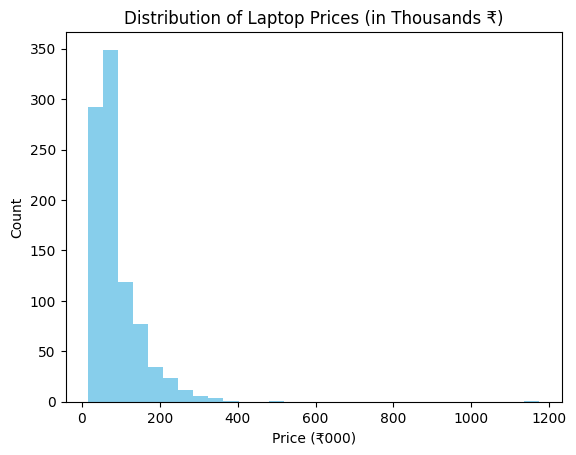

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#distribution of laptop prices

plt.hist(df_new['price'].values / 1000, bins=30, color='skyblue')
plt.title("Distribution of Laptop Prices (in Thousands ₹)")
plt.xlabel("Price (₹000)")
plt.ylabel("Count")
plt.show()
#with this chart you can find out the number of expensive, cheap and average price of laptops. 
#and additionally, i guess that a company supporter can easily give pieces of advise (about prices) 
#to their costumers based on this chart.

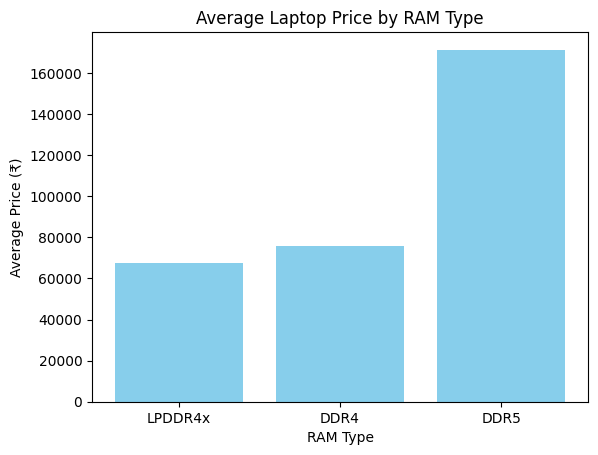

In [22]:
df_new["ram_type"] = df_new[["ram_DDR4", "ram_DDR5", "ram_lpddr4x"]].idxmax(axis=1)
df_new["ram_type"] = df_new["ram_type"].replace({
    "ram_DDR4": "DDR4",
    "ram_DDR5": "DDR5",
    "ram_lpddr4x": "LPDDR4x"
})

avg_prices = df_new.groupby("ram_type")["price"].mean().sort_values()

plt.bar(avg_prices.index, avg_prices.values, color='skyblue')
plt.title("Average Laptop Price by RAM Type")
plt.xlabel("RAM Type")
plt.ylabel("Average Price (₹)")
plt.show()

# i wanted to show how effective the RAM is in the field of price.
#and as it highlights, the DDR5 rams are the most expensive ones
#therefore, the type and size of the ram has got impact on the price

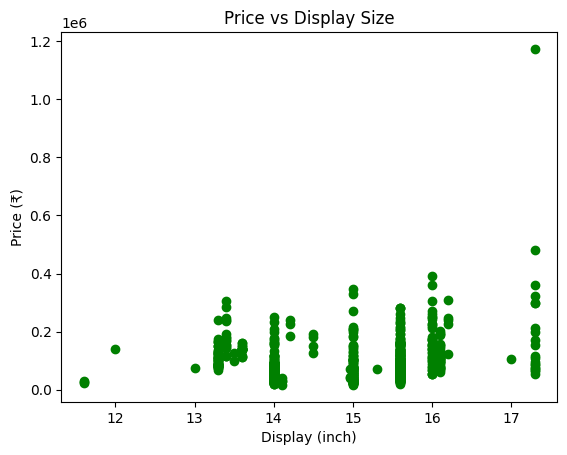

In [23]:
plt.scatter(df_new['display'], df_new['price'], color='green')
plt.title("Price vs Display Size")
plt.xlabel("Display (inch)")
plt.ylabel("Price (₹)")
plt.show()

#Laptop prices don't have a very direct and clear relationship with screen size,
#but laptops with larger screens (like 16 and 17 inches) are usually more expensive.

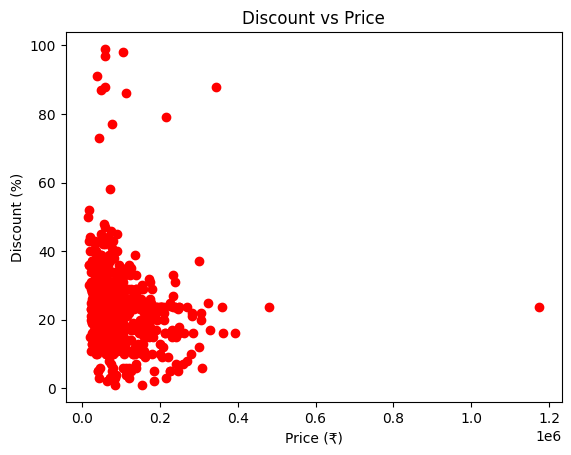

In [24]:
plt.scatter(df_new['price'], df_new['discount'], color='red')
plt.title("Discount vs Price")
plt.xlabel("Price (₹)")
plt.ylabel("Discount (%)")
plt.show()
#The relationship between discount and price is negative
# all in all, the lower the price, the lower the discount
#sellers give more discounts on cheaper products to sell more
#But more luxurious products maintain their profit margins

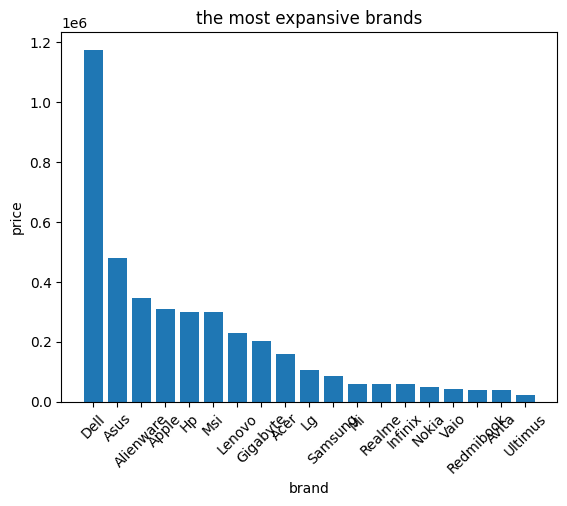

In [25]:
import matplotlib.pyplot as plt

max_price_by_brand = df_new.groupby('brand')['price'].max().sort_values(ascending=False)

plt.bar(range(len(max_price_by_brand)), max_price_by_brand.values)
plt.title("the most expansive brands")
plt.xlabel("brand")
plt.ylabel('price')
plt.xticks(range(len(max_price_by_brand)), max_price_by_brand.index, rotation=45)
plt.show()

# you can see the most expensive and the cheapest brands in this chart.
